### Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$f(x) = sin(x / 5) exp(x / 10) + 5exp(-x / 2)$

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [43]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
def func(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x/2.)

In [169]:
def system(dots):
    A = np.zeros((len(dots), len(dots)))
    for i in range(A.shape[0]):
        A[i] = np.power(dots, i)
    return A.T

def vector(func, dots):
    return np.array([func(i) for i in dots])

def result(func, dots):
    return linalg.solve(system(dots), vector(func, dots))

In [204]:
dots_1 = np.array([1., 15.])
dots_2 = np.array([1., 8., 15.])
dots_3 = np.array([1., 4., 10., 15.])
dots = np.arange(1., 15., 0.01)

In [205]:
frst = result(func, dots_1)
scnd = result(func, dots_2)
thrd = result(func, dots_3)

In [184]:
def func_1(x):
    a = 0
    for i in range(len(frst)):
        a += frst[i] * np.power(x, i)
    return a

def func_2(x):
    a = 0
    for i in range(len(scnd)):
        a += scnd[i] * np.power(x, i)
    return a

def func_3(x):
    a = 0
    for i in range(len(thrd)):
        a += thrd[i] * np.power(x, i)
    return a

[ 3.43914511 -0.18692825] [ 3.32512949 -0.06531159 -0.00760104] [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


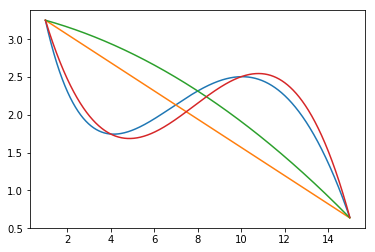

In [206]:
print(frst, scnd, thrd)
plt.plot(dots, vector(func, dots), dots, vector(func_1, dots), dots, vector(func_2, dots), dots, vector(func_3, dots))
plt.show()